<a href="https://colab.research.google.com/github/DavidCastro88/CustomerSegmentationKmeans/blob/main/K_meansCustomerSegmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***Customer Segmentation***

In [85]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn import preprocessing
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer
from sklearn.preprocessing import StandardScaler
import matplotlib.cm as cm
from sklearn.metrics import silhouette_samples, silhouette_score

In [82]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [191]:
data= pd.read_csv('https://raw.githubusercontent.com/DavidCastro88/CustomerSegmentationKmeans/main/Mall_Customers.csv', sep=',',decimal='.')
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


**Speding Score (1-100):** assigned by the mall based on customer behavior and spending nature

## ***Exploratory Data Analysis***

In [32]:
data.shape

(200, 5)

In [33]:
data.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [34]:
data['Gender']=data['Gender'].replace({'Female': 0, 'Male': 1})
data

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40
...,...,...,...,...,...
195,196,0,35,120,79
196,197,0,45,126,28
197,198,1,32,126,74
198,199,1,32,137,18


In [35]:
data.dtypes

CustomerID                int64
Gender                    int64
Age                       int64
Annual Income (k$)        int64
Spending Score (1-100)    int64
dtype: object

In [36]:
data.describe()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,0.440000,38.850000,60.560000,50.200000
std,57.879185,0.497633,13.969007,26.264721,25.823522
min,1.000000,0.000000,18.000000,15.000000,1.000000
25%,50.750000,0.000000,28.750000,41.500000,34.750000
50%,100.500000,0.000000,36.000000,61.500000,50.000000
75%,150.250000,1.000000,49.000000,78.000000,73.000000
max,200.000000,1.000000,70.000000,137.000000,99.000000


In [38]:
data=data.rename(columns={'Annual Income (k$)':'Income','Spending Score (1-100)':'Spending'})

In [39]:
data

,CustomerID,Gender,Age,Income,Spending
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40
...,...,...,...,...,...
195,196,0,35,120,79
196,197,0,45,126,28
197,198,1,32,126,74
198,199,1,32,137,18


### ***Univarite Analysis***

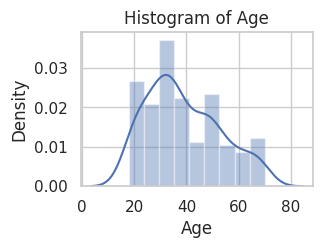

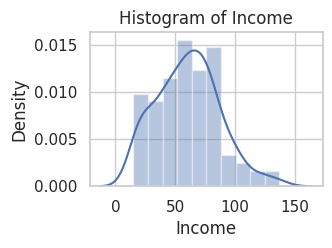

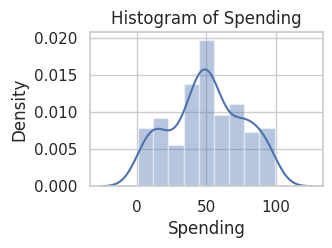

In [55]:
columns = ['Age', 'Income', 'Spending']

for feature in columns:
    sns.set(style="whitegrid")
    plt.figure(figsize=(3, 2))
    sns.histplot(data[feature],
                 kde=True,
                 stat="density",
                 kde_kws=dict(cut=3),
                 alpha=.4,
                 edgecolor=(1, 1, 1, .4))
    plt.title(f'Histogram of {feature}')
    plt.show()

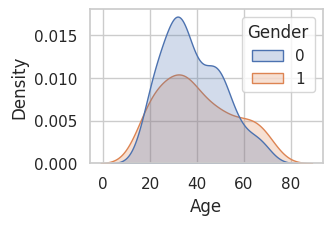

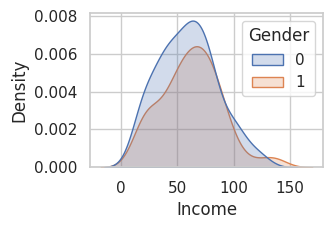

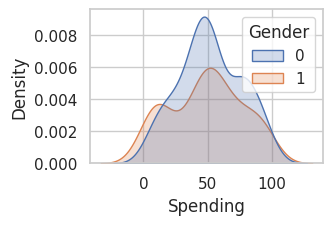

In [61]:
for feature in columns:
  sns.set(style="whitegrid")
  plt.figure(figsize=(3, 2))
  sns.kdeplot(data=data, x=feature, fill=True, hue='Gender')
  plt.show()

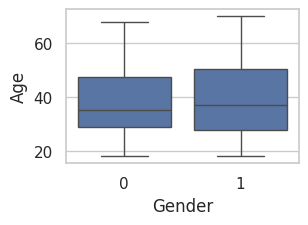

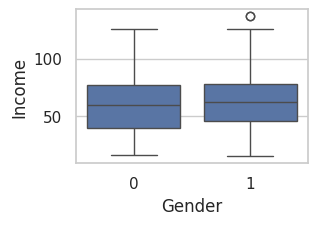

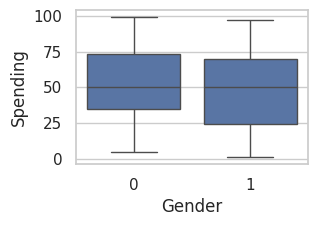

In [66]:
for feature in columns:
  plt.figure(figsize=(3, 2))
  sns.boxplot(data=data,x='Gender',y=data[feature])

In [67]:
data['Gender'].value_counts()

0    112
1     88
Name: Gender, dtype: int64

### ***Bivariate Analysis***

<Axes: xlabel='Income', ylabel='Spending'>

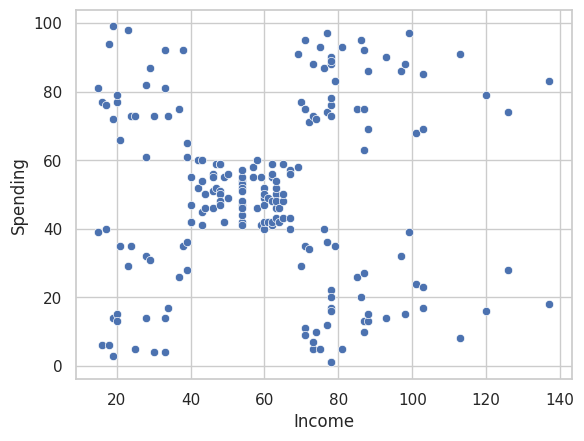

In [68]:
sns.scatterplot(data=data,x='Income',y='Spending')

<Axes: xlabel='Income', ylabel='Age'>

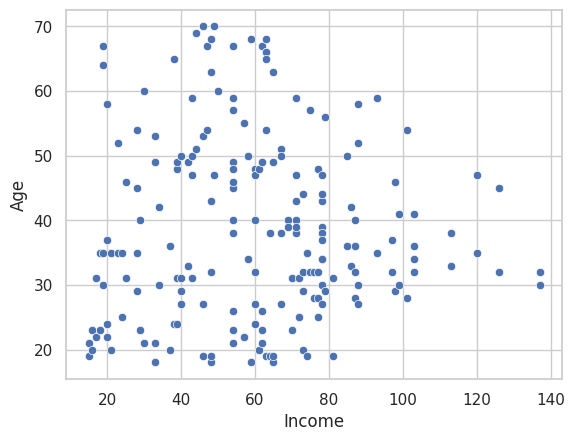

In [69]:
sns.scatterplot(data=data,x='Income',y='Age')

<Axes: xlabel='Spending', ylabel='Age'>

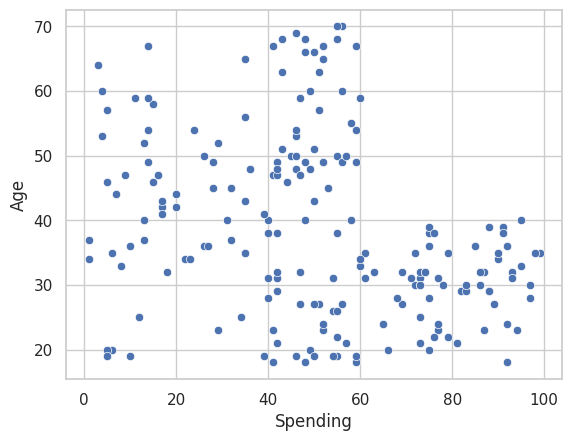

In [70]:
sns.scatterplot(data=data,x='Spending',y='Age')

In [ ]:
data=data.drop('CustomerID',axis=1)

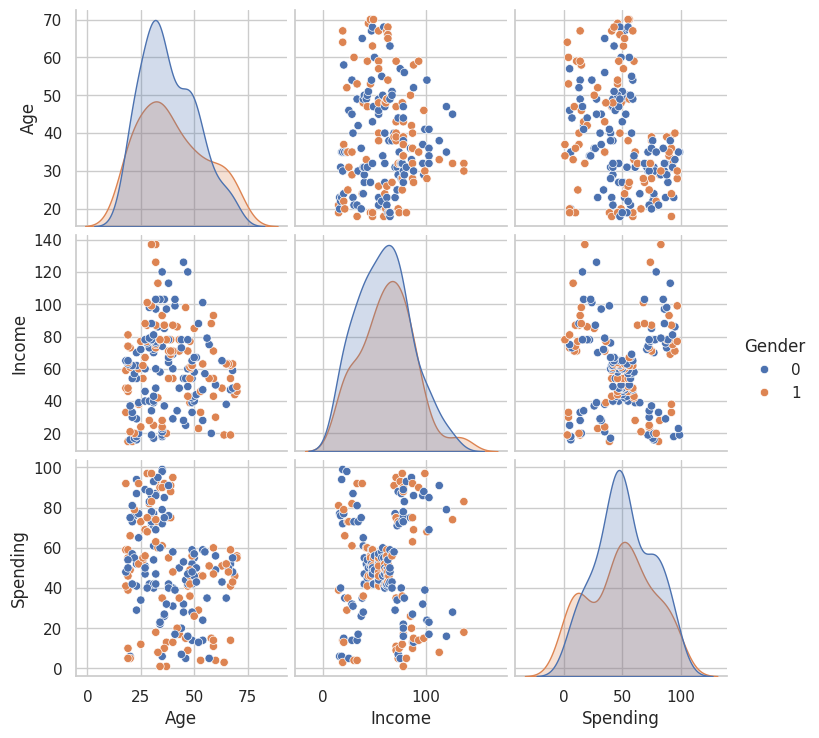

In [75]:
sns.pairplot(data,hue='Gender');

In [185]:
data.groupby(['Gender'])['Age','Income','Spending'].mean()

,Age,Income,Spending
Gender,,,
0,38.098214,59.250000,51.526786
1,39.806818,62.227273,48.511364


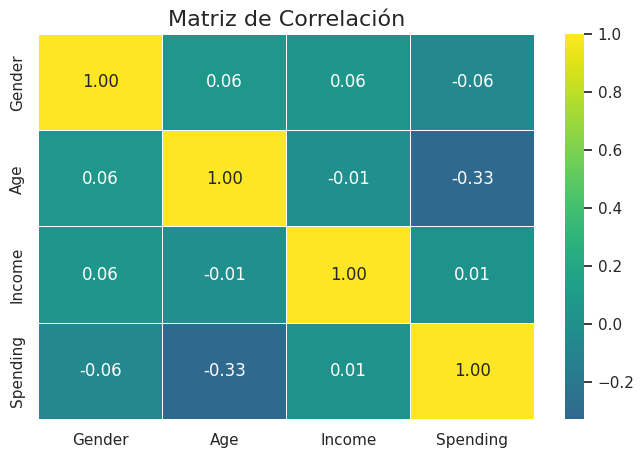

In [77]:
correlation_matrix = data.corr(numeric_only=True)
plt.figure(figsize=(8, 5))
sns.heatmap(correlation_matrix, annot=True, cmap='viridis', center=0, fmt=".2f", linewidths=0.5, cbar=True)
plt.title('Matriz de Correlación', fontsize=16)
plt.show()

### ***Clustering***

In [165]:
data_cl = data.copy()
data_cl=data_cl[['Age','Income','Spending']]
scaler = StandardScaler()
data_cl[data_cl.columns] = scaler.fit_transform(data_cl[data_cl.columns])
X_train, X_val = train_test_split(data_cl, test_size=0.2, random_state=1983)
X_cl = X_train.copy()
X_clv = X_val.copy()

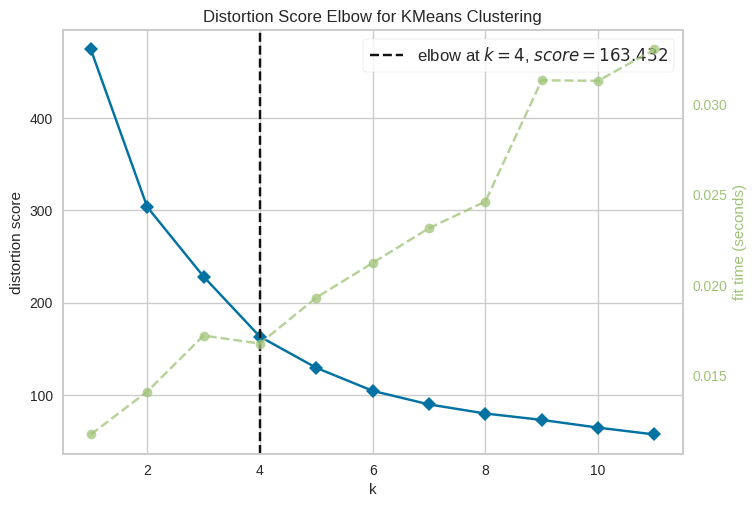

In [166]:
model = KMeans(random_state=88)
visualizer = KElbowVisualizer(model, k=(1, 12))
visualizer.fit(X_train)
visualizer.show();

In [167]:
def generate_siluet(X_train, n_clusters):
    model = KMeans(n_clusters=n_clusters, n_init="auto", random_state=88)
    cluster_labels = model.fit_predict(X_train)
    silhouette_avg = silhouette_score(X_train, cluster_labels)
    sample_silhouette_values = silhouette_samples(X_train, cluster_labels)
    plt.figure(figsize=(9, 5))
    plt.xlim([-0.1, 1])
    plt.ylim([0, len(X_train) + (n_clusters + 1) * 10])
    y_lower = 10
    for i in range(n_clusters):
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i
        color = cm.nipy_spectral(float(i) / n_clusters)
        plt.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )
        plt.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
        y_lower = y_upper + 10
    plt.title(f"Silhouette analysis for KMeans clustering with {n_clusters} clusters")
    plt.xlabel("Silhouette coefficient values")
    plt.ylabel("Cluster label")
    plt.axvline(x=silhouette_avg, color="red", linestyle="--")
    plt.text(silhouette_avg + 0.02, 5, f'Average Silhouette Score: {silhouette_avg:.4f}', color="red")
    plt.yticks([])
    plt.xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
    plt.show()

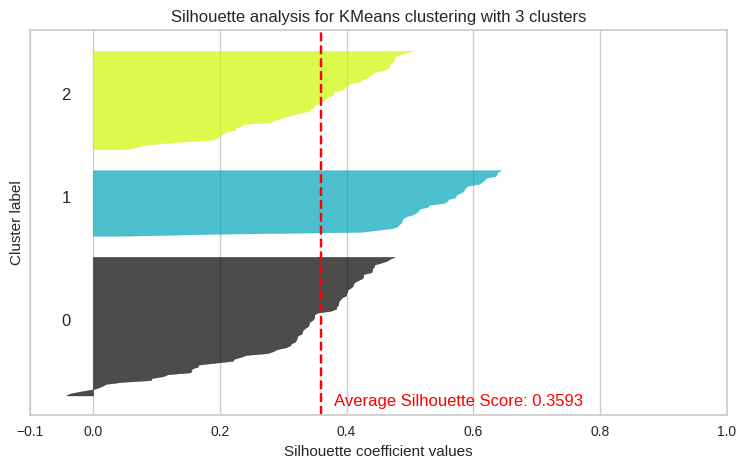

In [168]:
generate_siluet(X_train,3)

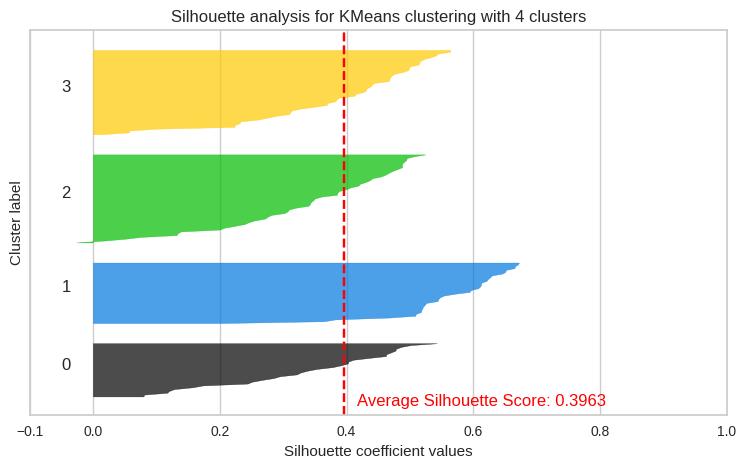

In [169]:
generate_siluet(X_train,4)

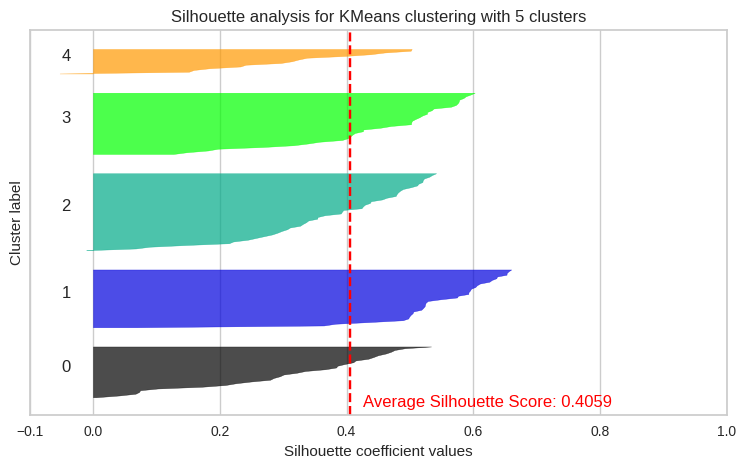

In [170]:
generate_siluet(X_train,5)

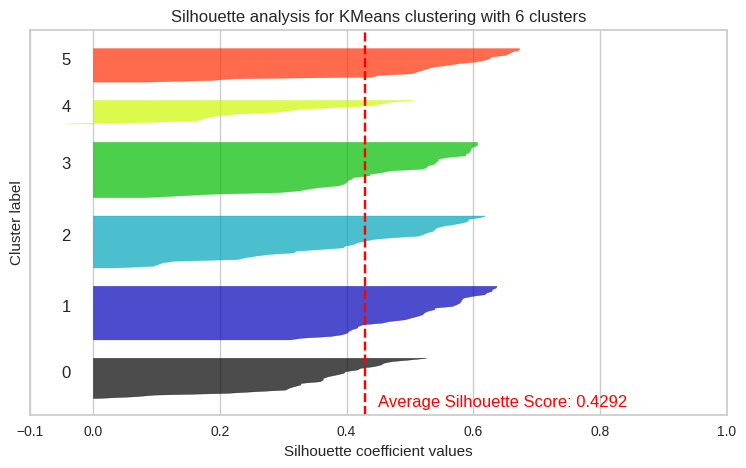

In [171]:
generate_siluet(X_train,6)

In [172]:
inertia_scores=[]
for i in range(1,11):
  kmeans=KMeans(n_clusters=i)
  kmeans.fit(X_train)
  inertia_scores.append(kmeans.inertia_)
inertia_scores

[474.1482889252499,
 303.76991733961586,
 228.4079911125255,
 163.43231077382518,
 129.72327187672244,
 104.8146663870684,
 90.13171940065413,
 80.47318211920877,
 72.38914552937429,
 66.5337757294458]

From the elbow graph and the silhouette graph, the number of clusters to use is 5.

In [173]:
kmeans_model = KMeans(n_clusters=5,n_init = 'auto', random_state=88)
kmeans_model.fit(X_train)

KMeans(n_clusters=5, n_init='auto', random_state=88)

In [174]:
y_lab = kmeans_model.fit_predict(X_train)
pd.crosstab(y_lab,'Conteo')

col_0,Conteo
row_0,
0,30
1,34
2,45
3,36
4,15


In [175]:
X_cl['Cluster'] = kmeans_model.labels_
X_cl['Cluster'].value_counts()

2    45
3    36
1    34
0    30
4    15
Name: Cluster, dtype: int64

In [176]:
clusters_val=kmeans_model.predict(X_clv)
X_clv['Cluster'] = clusters_val

In [177]:
X_clv['Cluster'].value_counts()

3    11
0     9
2     9
1     6
4     5
Name: Cluster, dtype: int64

In [178]:
data_cluster = pd.concat([X_cl, X_clv], ignore_index=False)
data_cluster

,Age,Income,Spending,Cluster
127,0.082532,0.398489,1.739206,1
197,-0.491602,2.497807,0.923953,1
89,0.800199,-0.097714,-0.163051,3
187,-0.778669,1.543572,0.691024,1
180,-0.132768,1.390894,-0.706552,0
...,...,...,...,...
114,-1.496335,0.169472,-0.085407,2
59,1.015499,-0.555747,-0.163051,3
104,0.728432,0.054964,0.225165,3
52,-0.563369,-0.670255,0.147522,2


In [179]:
data_cluster['Cluster']=data_cluster['Cluster'] + 1
data_cluster['Cluster'].value_counts()

3    54
4    47
2    40
1    39
5    20
Name: Cluster, dtype: int64

In [180]:
data_cluster

,Age,Income,Spending,Cluster
127,0.082532,0.398489,1.739206,2
197,-0.491602,2.497807,0.923953,2
89,0.800199,-0.097714,-0.163051,4
187,-0.778669,1.543572,0.691024,2
180,-0.132768,1.390894,-0.706552,1
...,...,...,...,...
114,-1.496335,0.169472,-0.085407,3
59,1.015499,-0.555747,-0.163051,4
104,0.728432,0.054964,0.225165,4
52,-0.563369,-0.670255,0.147522,3


In [181]:
data_customer = pd.merge(data, data_cluster[['Cluster']], left_index=True, right_index=True)
data_customer

,Gender,Age,Income,Spending,Cluster
0,1,19,15,39,3
1,1,21,15,81,3
2,0,20,16,6,5
3,0,23,16,77,3
4,0,31,17,40,3
...,...,...,...,...,...
195,0,35,120,79,2
196,0,45,126,28,1
197,1,32,126,74,2
198,1,32,137,18,1


In [182]:
import plotly.express as px
fig = px.scatter_3d(data_customer, x='Age', y='Income', z='Spending',
              color='Cluster')
fig.write_html("mi_grafico.html")
fig.show()

<Axes: xlabel='Income', ylabel='Spending'>

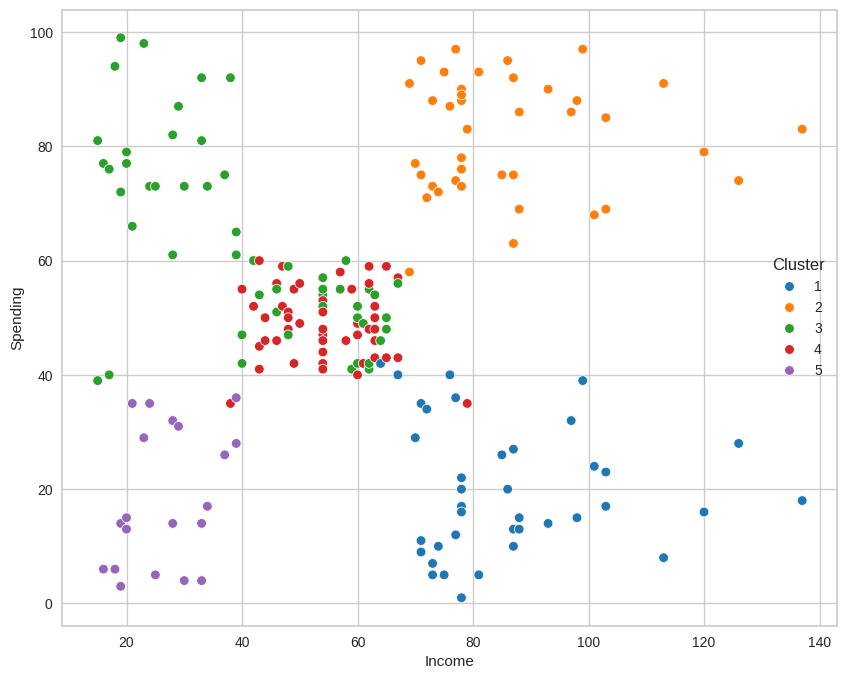

In [183]:
plt.figure(figsize=(10,8))
sns.scatterplot(data=data_customer,x='Income',y='Spending',hue='Cluster',palette='tab10')

In [184]:
pd.crosstab(data_customer['Cluster'],data_customer['Gender'])

Gender,0,1
Cluster,,
1,19,20
2,22,18
3,32,22
4,27,20
5,12,8


In [187]:
data_customer.groupby(['Cluster'])['Age','Income','Spending'].mean()

,Age,Income,Spending
Cluster,,,
1,39.871795,86.102564,19.358974
2,32.875000,86.100000,81.525000
3,25.185185,41.092593,62.240741
4,55.638298,54.382979,48.851064
5,46.250000,26.750000,18.350000


The cluster 1, have the customers with the hight income and low spending

The cluster 2, have the customers with the hight income and hight spending

The cluster 3, have the customers with the low income and hight spending

The cluster 4, have the customers with similar income and spending

The cluster 5, have the customers with the low income and low spending

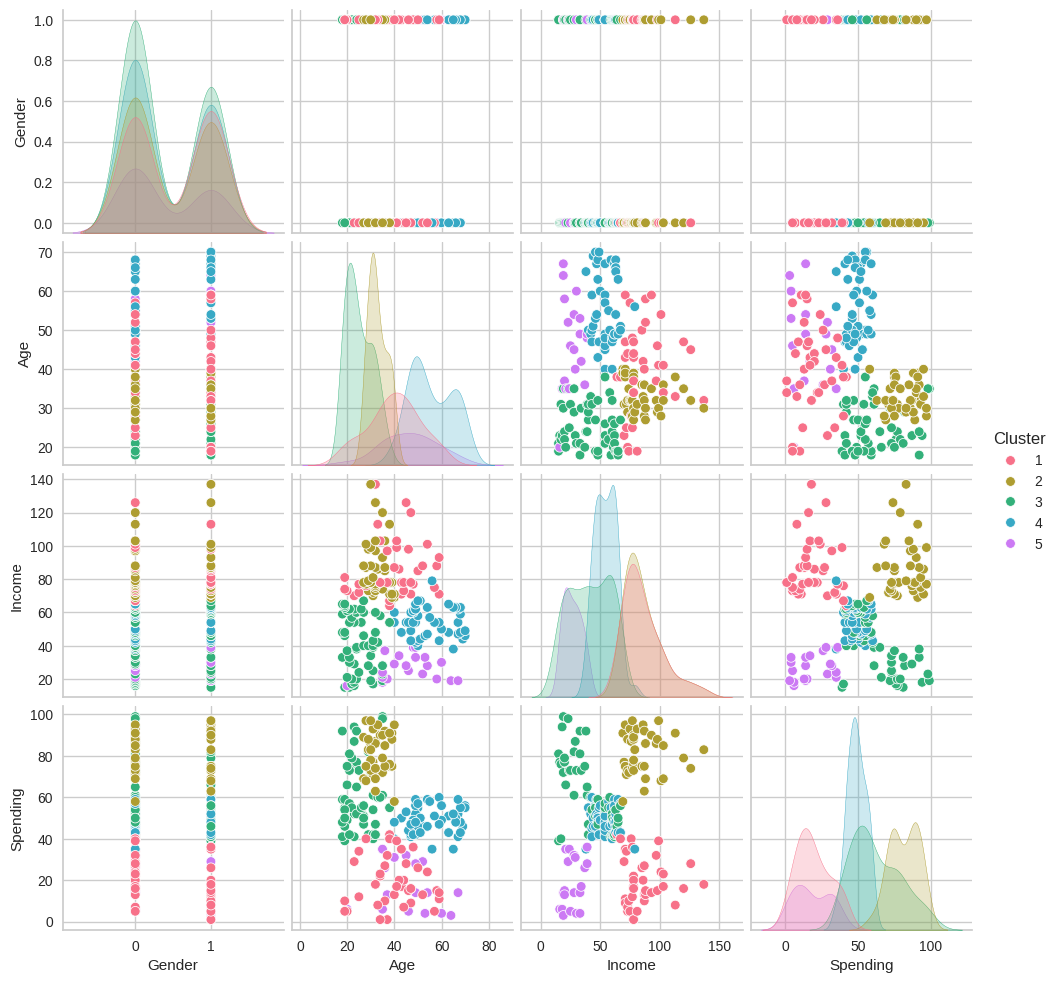

In [190]:
custom_palette = sns.color_palette("husl", n_colors=5)
sns.pairplot(data_customer, hue='Cluster', palette=custom_palette)
plt.show()